<a href="https://colab.research.google.com/github/andressalcedoandres/assignments/blob/master/Miami.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install osmnx

!pip install cartopy
!pip install folium
!pip install geoviews
!pip install holoviews
!pip install colorcet
!pip install panel==1.7.2

!pip install duckdb
!pip install urlparser

KeyboardInterrupt: 

In [ ]:
import osmnx as om

In [ ]:
%pip install contextily

In [ ]:

import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.geometry import shape
from shapely.geometry import Point
from urllib.parse import urlencode
import urllib.request, json
from urllib.parse import urljoin
import duckdb
import matplotlib.pyplot as plt
import contextily as ctx
import cartopy
import folium
import geoviews as gv

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create 6 different map visualizations
def create_map(title, filename):
    fig, ax = plt.subplots(figsize=(12, 8))

    # Simple grid representing miami
    data = np.random.rand(20, 20)

    im = ax.imshow(data, cmap='viridis', aspect='auto')
    ax.set_title(title, fontsize=24, pad=20)
    ax.axis('off')

    plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    plt.tight_layout()
    plt.savefig(filename, dpi=150, bbox_inches='tight', facecolor='#1a1a1a')
    plt.close()


# Generate all maps
create_map('Population Density', 'pop_density.png')
create_map('Income Distribution', 'income.png')
create_map('Housing Prices', 'housing.png')
create_map('Crime Rates', 'crime.png')
create_map('Transit Access', 'transit.png')
create_map('Green Spaces', 'parks.png')

# Build HTML
html = """
<!DOCTYPE html>
<html>
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>miami stats</title>
    <style>
        * { margin: 0; padding: 0; box-sizing: border-box; }
        body {
            font-family: monospace;
            background: #fff;
            color: #000;
        }
        .section {
            min-height: 100vh;
            display: flex;
            flex-direction: column;
            justify-content: center;
            align-items: center;
            padding: 60px 20px;
        }
        .text-section {
            min-height: 100vh;
            display: flex;
            justify-content: center;
            align-items: center;
            padding: 40px 20px;
            background: #fff;
        }
        h1 {
            font-size: 48px;
            margin-bottom: 20px;
        }
        p {
            font-size: 20px;
            margin-bottom: 40px;
            color: #666;
        }
        p1 {
            font-size: 20px;
            margin-bottom: 200px;
            color: #666;
            display: block;
        }
        .text-block {
            max-width: 1200px;
            font-size: 18px;
            line-height: 1.8;
            color: #333;
            width: 100%;
        }
        .text-block img {
             width: 100%;
            max-width: 1000px;
            height: auto;
            margin-top: 60px;
            margin-bottom: 60px;
            margin-left: 150px;
        }
        }
        img {
            width: 90%;
            max-width: 1000px;
            height: auto;
            margin-top: 60px;
            margin-bottom: 60px;
            margin-left: 150px;
        }
        .section img {
            width: 100%;
        }


    </style>
</head>
<body>
    <div class="section">
        <h1>Miami and Cars</h1>
        <p>Scroll to learn about how to make Miami safer and friendlier to all forms of all transit</p>
        <p1>Andres Salcedo</p1>
    </div>

    <div class="section">
        <h1>Miami's land-use</h1>
    </div>

   <div class="text-section">
        <div class="text-block">
            <p>Looking at % for Miami's land-use %</p>
              <img src="download.png" alt="population density map">
        </div>
    </div>
       <div class="text-section">
        <div class="text-block">
            <p>Miami's buildings</p>
              <img src="buildings.png" alt="population density map">
        </div>
    </div>

   <div class="text-section">
        <div class="text-block">
            <p>Miami's parks %</p>
              <img src="parks.png" alt="population density map">
        </div>
    </div>

           <div class="text-section">
        <div class="text-block">
            <p>Miami's roads %</p>
              <img src="roads.png" alt="population density map">
        </div>
    </div>

    <div class="section">
        <h1>Car dependency</h1>
        <p>Commuter statistics in Miami</p>
            <div class="text-section">
        <div class="text-block">
            <p>Miami's vehicle ownership rates</p>
              <img src="miami_vehicles_simple.png" alt="population density map">
        </div>
    </div>
<iframe src="miami_commute_map.html" width="100%" height="600px" style="border: 200px;padding-left: 500px;padding-right: 500px;margin-left: 600px;margin-right: 600px;">
</iframe>
    </div>

    <div class="section">
        <h1>Income Inequality</h1>
        <p>Explore income statistics in Miami</p>
<iframe src="miami_income_map.html" width="100%" height="600px" style="border: 200px;padding-left: 500px;padding-right: 500px;margin-left: 600px;margin-right: 600px;">
</iframe>
    </div>

    <div class="text-section">
        <div class="text-block">
            <p></p>
        </div>
    </div>


</body>
</html>
"""

with open('miami_stats.html', 'w') as f:
    f.write(html)

print("created miami_stats.html + 6 map images")

created miami_stats.html + 6 map images


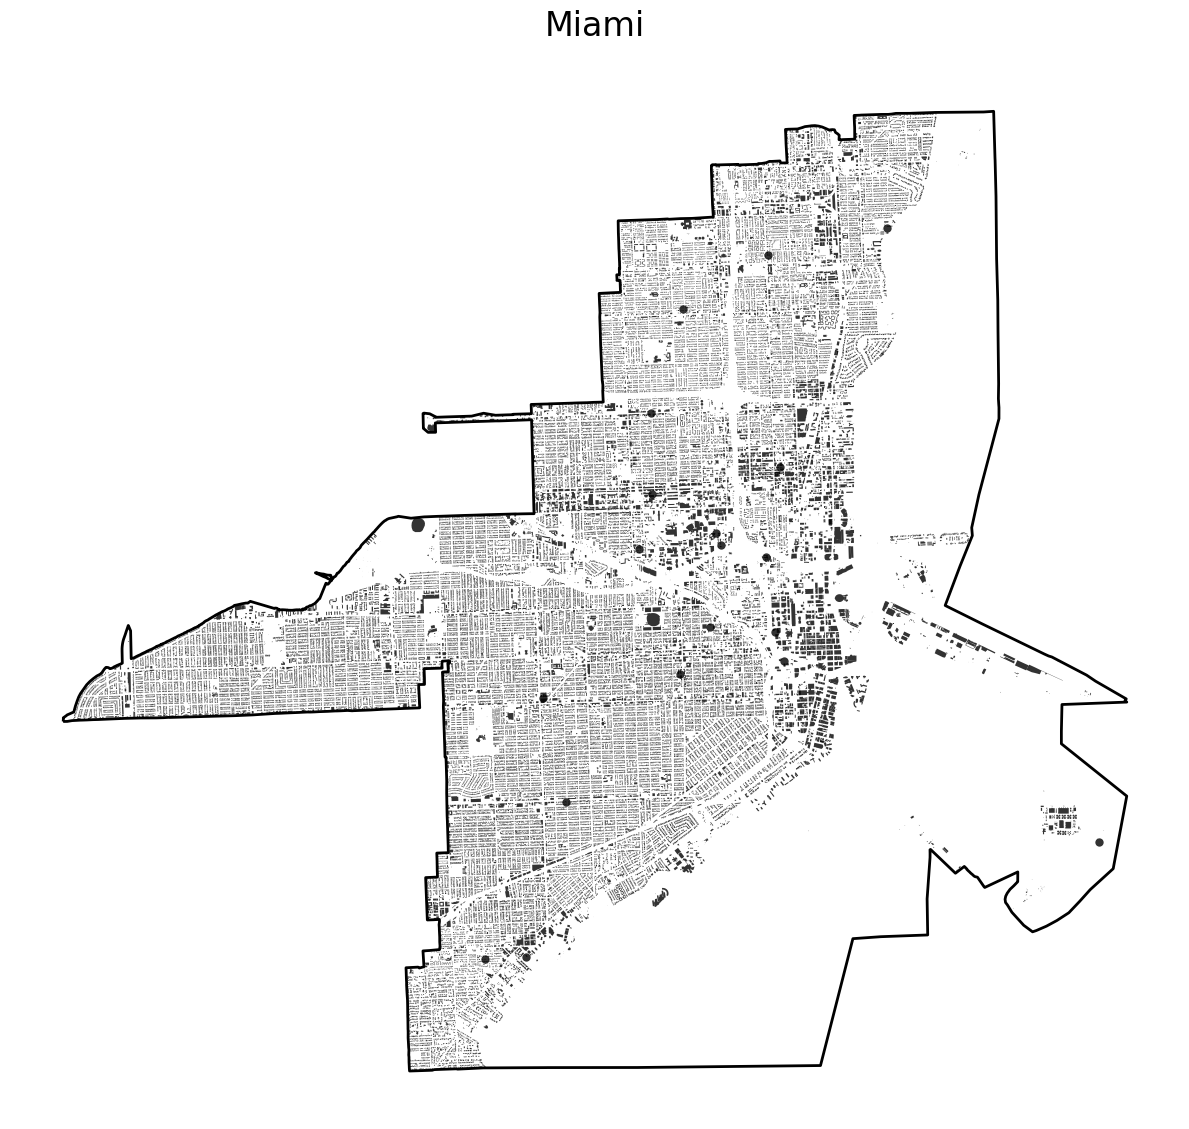

cropped to 71430 buildings within miami boundaries


In [ ]:
import osmnx as ox
import matplotlib.pyplot as plt

# get miami city boundary
place = "Miami, Florida, USA"
miami_boundary = ox.geocode_to_gdf(place)

# get buildings within miami
buildings = ox.features_from_place(place, tags={'building': True})

# convert to same crs
buildings = buildings.to_crs(miami_boundary.crs)

# crop buildings to exact miami boundary
buildings_cropped = buildings.clip(miami_boundary)

# plot minimalist
fig, ax = plt.subplots(figsize=(12, 12))

# plot boundary first (optional, remove if too busy)
miami_boundary.boundary.plot(ax=ax, color='black', linewidth=2)

# plot buildings
buildings_cropped.plot(ax=ax, color='black', alpha=0.8, linewidth=0)

ax.set_title('Miami', fontsize=24, pad=20)
ax.set_axis_off()
ax.set_facecolor('white')

plt.tight_layout()
plt.savefig('miami_minimal.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()

print(f"cropped to {len(buildings_cropped)} buildings within miami boundaries")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import matplotlib.pyplot as plt

# data
categories = ['No Vehicle', '1 Vehicle', '2 Vehicles', '3+ Vehicles']
values = [4.35, 24.52, 38.78, 32.35]
colors = ['#ff6b6b', '#4ecdc4', '#ffe66d', '#a8e6cf']

# create figure
fig, ax = plt.subplots(figsize=(12, 8))
fig.patch.set_facecolor('white') # Changed from '#1a1a2e' to 'white'
ax.set_facecolor('white') # Changed from '#1a1a2e' to 'white'

# horizontal bars
bars = ax.barh(categories, values, color=colors, height=0.6)

# customize
ax.set_xlim(0, 50)
ax.set_xlabel('Percentage (%)', color='black', fontsize=14, family='monospace') # Changed from 'white' to 'black'
ax.tick_params(colors='black', labelsize=12) # Changed from 'white' to 'black'
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('black') # Changed from 'white' to 'black'
ax.spines['left'].set_color('black') # Changed from 'white' to 'black'
ax.grid(axis='x', color='#cccccc', linestyle='--', alpha=0.6) # Changed from 'white' to light gray

# add percentage labels on bars
for i, (bar, val) in enumerate(zip(bars, values)):
    ax.text(val + 1, i, f'{val}%', va='center', color='black',
            fontsize=13, family='monospace', weight='bold') # Changed from 'white' to 'black'

# title
plt.title('Miami Vehicle Ownership', color='black', fontsize=22,
          pad=20, family='monospace', weight='bold', loc='left') # Changed from 'white' to 'black'

plt.tight_layout()
plt.savefig('miami_vehicles_simple.png', dpi=150, facecolor='white') # Changed from '#1a1a2e' to 'white'
plt.show()

print("saved miami_vehicles_simple.png")

In [ ]:
#BEFORE PRESENTING



import matplotlib.pyplot as plt
import numpy as np

# Create 6 different map visualizations
def create_map(title, filename):
    fig, ax = plt.subplots(figsize=(12, 8))

    # Simple grid representing miami
    data = np.random.rand(20, 20)

    im = ax.imshow(data, cmap='viridis', aspect='auto')
    ax.set_title(title, fontsize=24, pad=20)
    ax.axis('off')

    plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    plt.tight_layout()
    plt.savefig(filename, dpi=150, bbox_inches='tight', facecolor='#1a1a1a')
    plt.close()


# Generate all maps
create_map('Population Density', 'pop_density.png')
create_map('Income Distribution', 'income.png')
create_map('Housing Prices', 'housing.png')
create_map('Crime Rates', 'crime.png')
create_map('Transit Access', 'transit.png')
create_map('Green Spaces', 'parks.png')

# Build HTML
html = """
<!DOCTYPE html>
<html>
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>miami stats</title>
    <style>
        * { margin: 0; padding: 0; box-sizing: border-box; }
        body {
            font-family: monospace;
            background: #fff;
            color: #000;
        }
        .section {
            min-height: 100vh;
            display: flex;
            flex-direction: column;
            justify-content: center;
            align-items: center;
            padding: 60px 20px;
        }
        .text-section {
            min-height: 100vh;
            display: flex;
            justify-content: center;
            align-items: center;
            padding: 40px 20px;
            background: #fff;
        }
        h1 {
            font-size: 48px;
            margin-bottom: 20px;
        }
        p {
            font-size: 20px;
            margin-bottom: 40px;
            color: #666;
        }
        p1 {
            font-size: 20px;
            margin-bottom: 200px;
            color: #666;
            display: block;
        }
        .text-block {
            max-width: 1200px;
            font-size: 18px;
            line-height: 1.8;
            color: #333;
            width: 100%;
        }
        .text-block img {
             width: 100%;
            max-width: 1000px;
            height: auto;
            margin-top: 60px;
            margin-bottom: 60px;
            margin-left: 150px;
        }
        }
        img {
            width: 90%;
            max-width: 1000px;
            height: auto;
            margin-top: 60px;
            margin-bottom: 60px;
            margin-left: 150px;
        }
        .section img {
            width: 100%;
        }


    </style>
</head>
<body>
    <div class="section">
        <h1>Miami and Cars</h1>
        <p>Scroll to learn about how to make Miami safer and friendlier to all forms of all transit</p>
        <p1>Andres Salcedo</p1>
        <img src="pop_density.png" alt="population density map">
    </div>

    <div class="text-section">
        <div class="text-block">
            <p>Miami's vehicle ownership rates</p>
              <img src="miami_vehicles_simple.png" alt="population density map">
        </div>
    </div>

    <div class="section">
        <h1>Miami's land-use</h1>
    </div>

   <div class="text-section">
        <div class="text-block">
            <p>Looking at % for Miami's land-use %</p>
              <img src="download.png" alt="population density map">
        </div>
    </div>
       <div class="text-section">
        <div class="text-block">
            <p>Miami's buildings</p>
              <img src="buildings.png" alt="population density map">
        </div>
    </div>

   <div class="text-section">
        <div class="text-block">
            <p>Miami's parks %</p>
              <img src="parks.png" alt="population density map">
        </div>
    </div>

           <div class="text-section">
        <div class="text-block">
            <p>Miami's roads %</p>
              <img src="roads.png" alt="population density map">
        </div>
    </div>

    <div class="text-section">
        <div class="text-block">
            <p>[add your analysis text here]</p>
        </div>
    </div>

    <div class="section">
        <h1>Housing Prices</h1>
        <p>Median home values across the city</p>
<iframe src="miami_income_map.html" width="100%" height="600px" style="border: 200px;padding-left: 500px;padding-right: 500px;margin-left: 600px;margin-right: 600px;">
</iframe>
    </div>

    <div class="text-section">
        <div class="text-block">
            <p>[add your analysis text here]</p>
        </div>
    </div>

    <div class="section">
        <h1>Crime Rates</h1>
        <p>Safety statistics by neighborhood</p>
<iframe src="miami_commute_map.html" width="100%" height="600px" style="border: 200px;padding-left: 500px;padding-right: 500px;margin-left: 600px;margin-right: 600px;">
</iframe>
    </div>

    <div class="text-section">
        <div class="text-block">
            <p>[add your analysis text here]</p>
        </div>
    </div>

    <div class="section">
        <h1>Transit Access</h1>
        <p>Public transportation coverage</p>
        <img src="transit.png" alt="transit map">
    </div>

    <div class="text-section">
        <div class="text-block">
            <p>[add your analysis text here]</p>
        </div>
    </div>

    <div class="section">
        <h1>Green Spaces</h1>
        <p>Parks and recreational areas</p>
        <img src="parks.png" alt="parks map">
    </div>

    <div class="text-section">
        <div class="text-block">
            <p>[add your analysis text here]</p>
        </div>
    </div>
</body>
</html>
"""

with open('miami_stats.html', 'w') as f:
    f.write(html)

print("created miami_stats.html + 6 map images")